In [67]:
#@title Importations

import matplotlib.pyplot as plt
import math
from numbers import Number


In [119]:
#@title Exemple 9.1

class Graphe:
    
    # Graphe représenté par une matrice d'adjacence. Il 
    def __init__(self, dirige=False, value=False):
        self._sommets = {}
        self._matrice = []
        self._dirige = dirige
        self._value = value
        if self._value:
            self._valeur_defaut = None
        else:
            self._valeur_defaut = False

    def get_sommets(self) -> list:
        return list(self._sommets.keys())
    
    def est_adjacent(self, sommet_1, sommet_2) -> bool:
        indice_1 = self._sommets[sommet_1]
        indice_2 = self._sommets[sommet_2]
        return self._matrice[indice_1][indice_2] not in [None, False]
    
    def get_poids(self, sommet_1, sommet_2):
        indice_1 = self._sommets[sommet_1]
        indice_2 = self._sommets[sommet_2]
        if not self._value:
            raise ValueError("Pas de poids dans un graphe valué")
        return self._matrice[indice_1][indice_2]


    # Pour Exercice 9.1        
    def ajouter_sommet(self, sommet):
        if sommet in self._sommets.keys():
            raise ValueError("Le sommet existe déjà")
        else:
            nouvel_indice = len(self._sommets)
            nouveau_tableau = [self._valeur_defaut] * (nouvel_indice + 1)
            self._sommets[sommet] = nouvel_indice
            for ligne in self._matrice:
                ligne.append(self._valeur_defaut)
            self._matrice.append(nouveau_tableau)

    # Pour Exercice 9.2
    def ajouter_arete(self, sommet_1, sommet_2, poids=None):
        if poids == None and self._value:
            raise ValueError("Il faut un poids dans un graphe valué")
        indice_1 = self._sommets[sommet_1]
        indice_2 = self._sommets[sommet_2]
        
        if self._value:
            valeur = poids
        else:
            valeur = True
        
        self._matrice[indice_1][indice_2] = valeur
        if not self._dirige:
            self._matrice[indice_2][indice_1] =  valeur
    
    def dessiner(self):
        sommets = sorted(self._sommets, key=lambda s: self._sommets[s])
        n = len(sommets)

        if n == 0:
            print("Graphe vide")
            return

        # --- Calcul du rayon du cercle du sommet : dépend de la taille du plus grand nom ---
        max_len = max(len(str(s)) for s in sommets)
        rayon_noeud = 0.25 + max_len * 0.10   # ajustable

        # --- Position des sommets sur un grand cercle ---
        R = 3 + rayon_noeud  # grande marge pour espacer
        positions = {}
        angle_step = 2 * math.pi / n
        for i, s in enumerate(sommets):
            angle = i * angle_step
            positions[s] = (R * math.cos(angle), R * math.sin(angle))

        fig, ax = plt.subplots(figsize=(7, 7))
        ax.set_aspect("equal")
        ax.axis("off")

        # --- Dessin des arêtes ---
        for s1 in sommets:
            i1 = self._sommets[s1]
            x1, y1 = positions[s1]

            for s2 in sommets:
                i2 = self._sommets[s2]
                valeur = self._matrice[i1][i2]

                if valeur in [None, False]:
                    continue

                if not self._dirige and i2 < i1:
                    continue

                x2, y2 = positions[s2]

                # ---- Calcul des points d'entrée/sortie sur le bord des cercles ----
                dx = x2 - x1
                dy = y2 - y1
                dist = math.sqrt(dx*dx + dy*dy)

                if dist == 0:
                    continue  # même sommet -> ignorer

                # Normalisation
                ux = dx / dist
                uy = dy / dist

                # Points où l'arête touche le bord des deux cercles
                start_x = x1 + ux * rayon_noeud
                start_y = y1 + uy * rayon_noeud
                end_x   = x2 - ux * rayon_noeud
                end_y   = y2 - uy * rayon_noeud

                # Ligne principale
                ax.plot([start_x, end_x], [start_y, end_y], linewidth=1, color="black")

                # Flèche si dirigé
                if self._dirige:
                    ax.annotate(
                        "",
                        xy=(end_x, end_y),
                        xytext=(start_x, start_y),
                        arrowprops=dict(
                            arrowstyle="->",
                            lw=1,
                            color="black"
                        ),
                    )

                # Afficher le poids seulement si numérique
                if self._value and isinstance(valeur, Number):
                    xm = (start_x + end_x) / 2
                    ym = (start_y + end_y) / 2

                    # Déplacement perpendiculaire pour ne pas superposer sur l'arête
                    ox = -uy * 0.15
                    oy =  ux * 0.15

                    ax.text(
                        xm + ox,
                        ym + oy,
                        str(valeur),
                        fontsize=10,
                        ha="center",
                        va="center",
                        color="black"
                    )

        # --- Dessin des sommets ---
        for s in sommets:
            x, y = positions[s]

            # Cercle ajusté
            circle = plt.Circle(
                (x, y),
                rayon_noeud,
                edgecolor="black",
                facecolor="white",
                linewidth=1.5
            )
            ax.add_patch(circle)

            # Label
            ax.text(
                x, y, str(s),
                fontsize=12,
                ha="center",
                va="center",
                color="black"
            )


In [177]:
from numbers import Number
import matplotlib.pyplot as plt
import math

def dessiner_graphe(graphe):
    # --- Sommets ---
    sommets = sorted(graphe.get_sommets(), key=lambda s: graphe._sommets[s])
    n = len(sommets)

    if n == 0:
        print("Graphe vide")
        return

    # --- Taille dynamique ---
    max_len = max(len(str(s)) for s in sommets)
    rayon_noeud = 0.25 + max_len * 0.10
    R = 3 + rayon_noeud

    # --- Positions circulaires ---
    positions = {}
    angle_step = 2 * math.pi / n
    for i, s in enumerate(sommets):
        angle = i * angle_step
        positions[s] = (R * math.cos(angle), R * math.sin(angle))

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect("equal")
    ax.axis("off")

    # --- Arêtes ---
    for s1 in sommets:
        i1 = graphe._sommets[s1]
        x1, y1 = positions[s1]

        for s2 in sommets:
            i2 = graphe._sommets[s2]
            valeur = graphe._matrice[i1][i2]

            if valeur in [None, False]:
                continue

            # Boucle : on ne dessine pas l'arête
            if s1 == s2:
                continue

            # Graphe non dirigé : éviter les doublons
            if not graphe._dirige and i2 < i1:
                continue

            x2, y2 = positions[s2]
            dx = x2 - x1
            dy = y2 - y1
            dist = math.sqrt(dx * dx + dy * dy)
            if dist == 0:
                continue
            ux = dx / dist
            uy = dy / dist

            start_x = x1 + ux * rayon_noeud
            start_y = y1 + uy * rayon_noeud
            end_x   = x2 - ux * rayon_noeud
            end_y   = y2 - uy * rayon_noeud

            # Ligne principale
            ax.plot([start_x, end_x], [start_y, end_y], linewidth=1, color="black")

            # Flèche principale (dirigé)
            if graphe._dirige:
                ax.annotate(
                    "",
                    xy=(end_x, end_y),
                    xytext=(start_x, start_y),
                    arrowprops=dict(arrowstyle="->", lw=1, color="black"),
                )

            # --- Poids légèrement au-dessus de l'arête ---
            if graphe._value and isinstance(valeur, Number):
                # Milieu de l'arête
                px = (start_x + end_x) / 2
                py = (start_y + end_y) / 2

                # Décalage perpendiculaire pour placer le poids au-dessus
                offset = 0.35
                ox = -uy * offset
                oy =  ux * offset

                wx = px + ox
                wy = py + oy

                ax.text(wx, wy, str(valeur), fontsize=11, ha="center", va="center", color="black")

                # Mini-flèche seulement si dirigé
                if graphe._dirige:
                    fx = wx + ux * 0.12
                    fy = wy + uy * 0.12
                    ax.annotate(
                        "",
                        xy=(end_x, end_y),
                        xytext=(fx, fy),
                        arrowprops=dict(arrowstyle="->", lw=1, color="black")
                    )

    # --- Sommets ---
    for s in sommets:
        x, y = positions[s]

        i = graphe._sommets[s]
        has_loop = graphe._matrice[i][i] not in [None, False]

        circle = plt.Circle((x, y), rayon_noeud,
                            edgecolor="black", facecolor="white", linewidth=1.5)
        ax.add_patch(circle)

        ax.text(x, y, str(s), fontsize=12, ha="center", va="center",
                color="black", fontweight=('bold' if has_loop else 'normal'))

        # Poids de la boucle
        if has_loop and graphe._value and isinstance(graphe._matrice[i][i], Number):
            ax.text(x, y - rayon_noeud - 0.1,
                    f"({graphe._matrice[i][i]})",
                    fontsize=10, ha="center", va="center", color="black")

    plt.show()


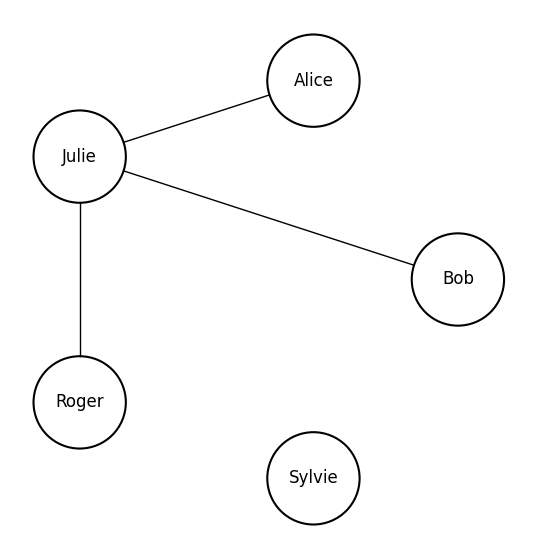

In [174]:
#title Exercice 8.2

graphe = Graphe(value=False, dirige=False)

personnes = ["Bob", "Alice", "Julie", "Roger", "Sylvie"]
for personne in personnes:
    graphe.ajouter_sommet(personne)

graphe.ajouter_arete("Bob", "Julie")
graphe.ajouter_arete("Julie", "Roger")
graphe.ajouter_arete("Julie", "Alice")

dessiner_graphe(graphe)


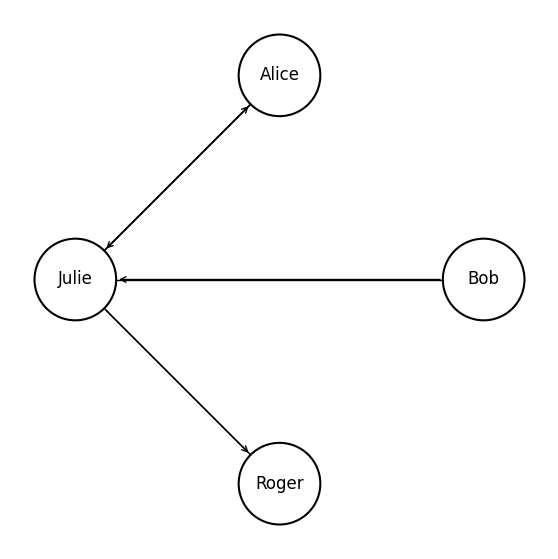

In [175]:
graphe = Graphe(value=False, dirige=True)

personnes = ["Bob", "Alice", "Julie", "Roger"]
for personne in personnes:
    graphe.ajouter_sommet(personne)

graphe.ajouter_arete("Bob", "Julie")
graphe.ajouter_arete("Julie", "Roger")
graphe.ajouter_arete("Julie", "Alice")
graphe.ajouter_arete("Alice", "Julie")

dessiner_graphe(graphe)

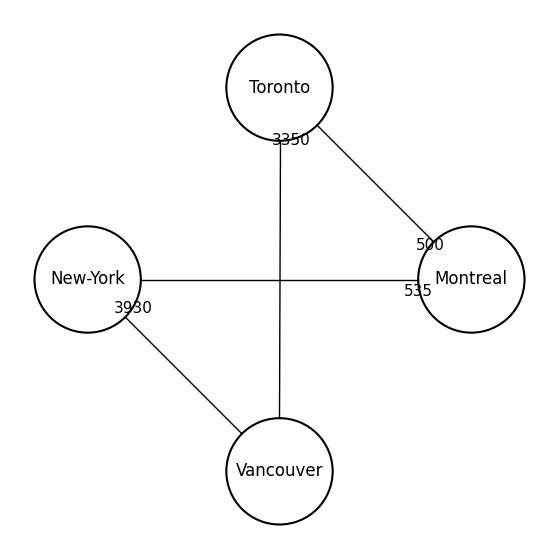

In [176]:
graphe = Graphe(value=True, dirige=False)

villes = ["Montreal", "Toronto", "New-York", "Vancouver"]
for ville in villes:
    graphe.ajouter_sommet(ville)

graphe.ajouter_arete("Montreal", "Toronto", 500)
graphe.ajouter_arete("Montreal", "New-York", 535)
graphe.ajouter_arete("Toronto", "Vancouver", 3350)
graphe.ajouter_arete("New-York", "Vancouver", 3930)

dessiner_graphe(graphe)